<a href="https://colab.research.google.com/github/rokzeezee/PortfolioProjects/blob/main/GROUNDHOG_DAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import folium
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
resp = requests.get('https://groundhog-day.com/api/v1/groundhogs')
resp.json().keys()

dict_keys(['groundhogs'])

In [4]:
df_groundhog_dataset = pd.DataFrame(resp.json()['groundhogs'])
df_groundhog_dataset .head()

,id,slug,shortname,name,city,region,country,coordinates,source,contact,currentPrediction,isGroundhog,type,active,successor,description,image,predictionsCount,predictions
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,https://www.npr.org/2024/02/02/1228547493/grou...,1,Groundhog,1,,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129,"[{'year': 1886, 'shadow': None, 'details': 'Gr..."
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",https://orphie.neocities.org,,https://www.fox43.com/article/news/local/groun...,0,Taxidermied groundhog,1,,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,92,"[{'year': 1926, 'shadow': 1, 'details': ''}, {..."
2,3,wiarton-willie,Willie,Wiarton Willie,Wiarton,Ontario,Canada,"44.7438686,-81.1386838",https://www.southbrucepeninsula.com/en/explore...,,https://www.owensoundsuntimes.com/news/wiarton...,1,Groundhog,1,,Wiarton Wille is Canada’s most famous prognost...,https://groundhog-day.com/images/ghogs/wiarton...,61,"[{'year': 1955, 'shadow': 0, 'details': 'No Sh..."
3,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,Wisconsin,USA,"43.1826322,-89.2143204",https://www.cityofsunprairie.com/840/Groundhog...,visit@cityofsunprairie.com,https://www.marshfieldnewsherald.com/story/new...,1,Groundhog,1,,"Jimmy the Groundhog is based in Sun Prairie, W...",https://groundhog-day.com/images/ghogs/jimmy-t...,56,"[{'year': 1969, 'shadow': 1, 'details': ''}, {..."
4,5,concord-charlie,Charlie,Concord Charlie,Athens,West Virginia,USA,"37.4245956,-81.0095902",https://www.concord.edu/?s=concord+charlie,,https://www.lootpress.com/concord-charlie-pred...,0,Presumed groundhog,1,,Concord Charlie is a presumed groundhog from A...,https://groundhog-day.com/images/ghogs/concord...,46,"[{'year': 1979, 'shadow': 1, 'details': ''}, {..."


In [5]:
df_groundhog_dataset.to_csv('groundhod_df.csv' , index=False)

In [6]:
df_groundhog_dataset['Latitude']=df_groundhog_dataset['coordinates'].str.split(',').str[0]
df_groundhog_dataset['Longitude'] = df_groundhog_dataset['coordinates'].str.split(',').str[1]

In [7]:
df_groundhog_dataset.head()

,id,slug,shortname,name,city,region,country,coordinates,source,contact,...,isGroundhog,type,active,successor,description,image,predictionsCount,predictions,Latitude,Longitude
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,...,1,Groundhog,1,,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129,"[{'year': 1886, 'shadow': None, 'details': 'Gr...",40.9311988,-78.9622483
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",https://orphie.neocities.org,,...,0,Taxidermied groundhog,1,,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,92,"[{'year': 1926, 'shadow': 1, 'details': ''}, {...",39.8255413,-76.0919567
2,3,wiarton-willie,Willie,Wiarton Willie,Wiarton,Ontario,Canada,"44.7438686,-81.1386838",https://www.southbrucepeninsula.com/en/explore...,,...,1,Groundhog,1,,Wiarton Wille is Canada’s most famous prognost...,https://groundhog-day.com/images/ghogs/wiarton...,61,"[{'year': 1955, 'shadow': 0, 'details': 'No Sh...",44.7438686,-81.1386838
3,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,Wisconsin,USA,"43.1826322,-89.2143204",https://www.cityofsunprairie.com/840/Groundhog...,visit@cityofsunprairie.com,...,1,Groundhog,1,,"Jimmy the Groundhog is based in Sun Prairie, W...",https://groundhog-day.com/images/ghogs/jimmy-t...,56,"[{'year': 1969, 'shadow': 1, 'details': ''}, {...",43.1826322,-89.2143204
4,5,concord-charlie,Charlie,Concord Charlie,Athens,West Virginia,USA,"37.4245956,-81.0095902",https://www.concord.edu/?s=concord+charlie,,...,0,Presumed groundhog,1,,Concord Charlie is a presumed groundhog from A...,https://groundhog-day.com/images/ghogs/concord...,46,"[{'year': 1979, 'shadow': 1, 'details': ''}, {...",37.4245956,-81.0095902


In [8]:
df_groundhog_dataset.head()


,id,slug,shortname,name,city,region,country,coordinates,source,contact,...,isGroundhog,type,active,successor,description,image,predictionsCount,predictions,Latitude,Longitude
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,...,1,Groundhog,1,,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129,"[{'year': 1886, 'shadow': None, 'details': 'Gr...",40.9311988,-78.9622483
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",https://orphie.neocities.org,,...,0,Taxidermied groundhog,1,,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,92,"[{'year': 1926, 'shadow': 1, 'details': ''}, {...",39.8255413,-76.0919567
2,3,wiarton-willie,Willie,Wiarton Willie,Wiarton,Ontario,Canada,"44.7438686,-81.1386838",https://www.southbrucepeninsula.com/en/explore...,,...,1,Groundhog,1,,Wiarton Wille is Canada’s most famous prognost...,https://groundhog-day.com/images/ghogs/wiarton...,61,"[{'year': 1955, 'shadow': 0, 'details': 'No Sh...",44.7438686,-81.1386838
3,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,Wisconsin,USA,"43.1826322,-89.2143204",https://www.cityofsunprairie.com/840/Groundhog...,visit@cityofsunprairie.com,...,1,Groundhog,1,,"Jimmy the Groundhog is based in Sun Prairie, W...",https://groundhog-day.com/images/ghogs/jimmy-t...,56,"[{'year': 1969, 'shadow': 1, 'details': ''}, {...",43.1826322,-89.2143204
4,5,concord-charlie,Charlie,Concord Charlie,Athens,West Virginia,USA,"37.4245956,-81.0095902",https://www.concord.edu/?s=concord+charlie,,...,0,Presumed groundhog,1,,Concord Charlie is a presumed groundhog from A...,https://groundhog-day.com/images/ghogs/concord...,46,"[{'year': 1979, 'shadow': 1, 'details': ''}, {...",37.4245956,-81.0095902


In [9]:
df_groundhog_dataset.dtypes

id                    int64
slug                 object
shortname            object
name                 object
city                 object
region               object
country              object
coordinates          object
source               object
contact              object
currentPrediction    object
isGroundhog           int64
type                 object
active                int64
successor            object
description          object
image                object
predictionsCount      int64
predictions          object
Latitude             object
Longitude            object
dtype: object

In [10]:
df_groundhog_dataset['Latitude']=df_groundhog_dataset['Latitude'].astype(float)
df_groundhog_dataset['Longitude']=df_groundhog_dataset['Longitude'].astype(float)

In [11]:
df_groundhog_dataset.dtypes

id                     int64
slug                  object
shortname             object
name                  object
city                  object
region                object
country               object
coordinates           object
source                object
contact               object
currentPrediction     object
isGroundhog            int64
type                  object
active                 int64
successor             object
description           object
image                 object
predictionsCount       int64
predictions           object
Latitude             float64
Longitude            float64
dtype: object

In [12]:
map=folium.Map(location = [df_groundhog_dataset['Latitude'].mean(), df_groundhog_dataset['Longitude'].mean()] , zoom_start=4)
map

for _, row in df_groundhog_dataset.iterrows():
  folium.Marker(location = [row['Latitude'] , row['Longitude'] ], popup= row['slug'] , tooltip= 'click me !!!').add_to(map)
map

In [13]:
for _, row in df_groundhog_dataset.query('isGroundhog	== 1').iterrows():
  folium.Marker(location = [row['Latitude'] , row['Longitude'] ], popup= row['slug'] , tooltip= 'Groundhog' ,icon=folium.Icon("green") ).add_to(map)

for _, row in df_groundhog_dataset.query('isGroundhog	== 0').iterrows():
  folium.Marker(location = [row['Latitude'] , row['Longitude'] ], popup= row['slug'] , tooltip= 'Groundhog' ,icon=folium.Icon("red") ).add_to(map)

map


In [14]:
df_groundhog_dataset.loc[df_groundhog_dataset['isGroundhog'] ==1].reset_index(drop= True).query('country == "USA"')

,id,slug,shortname,name,city,region,country,coordinates,source,contact,...,isGroundhog,type,active,successor,description,image,predictionsCount,predictions,Latitude,Longitude
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,"40.9311988,-78.9622483",https://www.groundhog.org/history-past-predict...,,...,1,Groundhog,1,,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,129,"[{'year': 1886, 'shadow': None, 'details': 'Gr...",40.931199,-78.962248
2,4,jimmy-the-groundhog,Jimmy,Jimmy the Groundhog,Sun Prairie,Wisconsin,USA,"43.1826322,-89.2143204",https://www.cityofsunprairie.com/840/Groundhog...,visit@cityofsunprairie.com,...,1,Groundhog,1,,"Jimmy the Groundhog is based in Sun Prairie, W...",https://groundhog-day.com/images/ghogs/jimmy-t...,56,"[{'year': 1969, 'shadow': 1, 'details': ''}, {...",43.182632,-89.214320
3,6,buckeye-chuck,Chuck,Buckeye Chuck,Marion,Ohio,USA,"40.6141291,-83.1321507,",https://en.wikipedia.org/wiki/Buckeye_Chuck#Pa...,,...,1,Groundhog,1,,Buckeye Chuck is a weather-predicting groundho...,https://groundhog-day.com/images/ghogs/buckeye...,41,"[{'year': 1980, 'shadow': 0, 'details': ''}, {...",40.614129,-83.132151
4,7,general-beauregard-lee,Beau,General Beauregard Lee,Jackson,Georgia,USA,"33.233898,-83.9466163",https://twitter.com/genbeaulee,,...,1,Groundhog,1,,General Beauregard Lee is Georgia’s Official W...,https://groundhog-day.com/images/ghogs/general...,41,"[{'year': 1982, 'shadow': 0, 'details': ''}, {...",33.233898,-83.946616
5,8,french-creek-freddie,Freddie,French Creek Freddie,Upshur County,West Virginia,USA,"38.8573662,-80.3149827",https://wvdnr.gov/french-creek-freddie-facts-t...,,...,1,Groundhog,1,,French Creek Freddie is a weather-predicting g...,https://groundhog-day.com/images/ghogs/french-...,36,"[{'year': 1980, 'shadow': 0, 'details': ''}, {...",38.857366,-80.314983
6,9,gertie-the-groundhog,Gertie,Gertie the Groundhog,Hanna City,Illinois,USA,"40.732973,-89.7383042",https://www.facebook.com/wildlifeprairiepark,,...,1,Groundhog,1,,Gertie the Groundhog is a celebrated meteorolo...,https://groundhog-day.com/images/ghogs/gertie-...,31,"[{'year': 1993, 'shadow': 1, 'details': ''}, {...",40.732973,-89.738304
7,10,dunkirk-dave,Dave,Dunkirk Dave,Dunkirk,New York,USA,"42.4609398,-79.3944887",https://www.dunkirkdave.com,https://www.dunkirkdave.com/contact/,...,1,Groundhog,1,,"Dunkirk Dave, from Dunkirk, New York, is the s...",https://groundhog-day.com/images/ghogs/dunkirk...,29,"[{'year': 1983, 'shadow': 0, 'details': ''}, {...",42.460940,-79.394489
8,11,malverne-mel,Malverne Mel,Malverne Mel,Malverne,New York,USA,"40.6793192,-73.6665466",https://www.facebook.com/crossroadsfarmatgross...,,...,1,Groundhog,1,,Groundhog Day with Malverne Mel is a tradition...,https://groundhog-day.com/images/ghogs/malvern...,29,"[{'year': 1996, 'shadow': 1, 'details': ''}, {...",40.679319,-73.666547
9,12,staten-island-chuck,Chuck,Staten Island Chuck,New York City,New York,USA,"40.6251281,-74.1175587",https://en.wikipedia.org/wiki/Staten_Island_Ch...,,...,1,Groundhog,1,,Staten Island Chuck — also known as Charles G....,https://groundhog-day.com/images/ghogs/staten-...,29,"[{'year': 1982, 'shadow': 0, 'details': ''}, {...",40.625128,-74.117559
10,15,holtsville-hal,Hal,Holtsville Hal,Holtsville,New York,USA,"40.7967917,-73.0358701",https://www.facebook.com/brookhavenwildlifecenter,,...,1,Groundhog,1,,"Holtsville Hal is the true-blue, first-rate No...",https://groundhog-day.com/images/ghogs/holtsvi...,26,"[{'year': 1999, 'shadow': 0, 'details': ''}, {...",40.796792,-73.035870


In [15]:
df_groundhog_dataset.loc[df_groundhog_dataset['isGroundhog'] ==0].reset_index(drop= True).query('country=="USA"')

,id,slug,shortname,name,city,region,country,coordinates,source,contact,...,isGroundhog,type,active,successor,description,image,predictionsCount,predictions,Latitude,Longitude
0,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,"39.8255413,-76.0919567",https://orphie.neocities.org,,...,0,Taxidermied groundhog,1,,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,92,"[{'year': 1926, 'shadow': 1, 'details': ''}, {...",39.825541,-76.091957
1,5,concord-charlie,Charlie,Concord Charlie,Athens,West Virginia,USA,"37.4245956,-81.0095902",https://www.concord.edu/?s=concord+charlie,,...,0,Presumed groundhog,1,,Concord Charlie is a presumed groundhog from A...,https://groundhog-day.com/images/ghogs/concord...,46,"[{'year': 1979, 'shadow': 1, 'details': ''}, {...",37.424596,-81.009590
2,13,lander-lil,Lil,Lander Lil,Lander,Wyoming,USA,"42.830629, -108.722943",https://www.facebook.com/BLMWyoming,,...,0,Statue of a prairie dog,1,,"Lander Lil, a bronze statue of a prairie dog, ...",https://groundhog-day.com/images/ghogs/lander-...,27,"[{'year': 1985, 'shadow': 0, 'details': ''}, {...",42.830629,-108.722943
4,19,mojave-max,Max,Mojave Max,Las Vegas,Nevada,USA,"36.1693608,-115.1906908",https://www.mojavemax.com/learn/meet-mojave-ma...,,...,0,Desert tortoise,1,,Mojave Max is a desert tortoise prognosticator...,https://groundhog-day.com/images/ghogs/mojave-...,24,"[{'year': 2000, 'shadow': 0, 'details': '2000-...",36.169361,-115.190691
5,21,schnogadahl-sammi,Sammi,Schnogadahl Sammi,Kresgeville,Pennsylvania,USA,"40.9014222,-75.497874",https://groundhoglodge.org/schedule/groundhog-...,,...,0,Taxidermied groundhog,1,,Schnogadahl Sammi is a literally unpronounceab...,https://groundhog-day.com/images/ghogs/schnoga...,23,"[{'year': 1997, 'shadow': 1, 'details': ''}, {...",40.901422,-75.497874
6,22,poor-richard,Richard,Poor Richard,York,Pennsylvania,USA,"39.9658603,-76.729263",http://www.yorkslumberinggroundhoglodge.com,,...,0,Taxidermied groundhog,1,,Poor Richard is a taxidermied groundhog who pr...,https://groundhog-day.com/images/ghogs/poor-ri...,22,"[{'year': 2001, 'shadow': 1, 'details': ''}, {...",39.965860,-76.729263
8,24,uni-the-groundhog,Uni,Uni the Groundhog,Myerstown,Pennsylvania,USA,"40.4181266,-76.2999232",https://www.facebook.com/Grundsau-Lodsch-17-Om...,,...,0,Taxidermied groundhog,1,,"Every year on February 2nd, Myerstown’s favori...",https://groundhog-day.com/images/ghogs/uni-the...,20,"[{'year': 2004, 'shadow': 1, 'details': ''}, {...",40.418127,-76.299923
9,25,grover-and-sue,Grover and Sue,Grover and Sue,Pine Grove,Pennsylvania,USA,"40.5716175,-76.3676593",https://www.facebook.com/SweetArrowLake,,...,0,Taxidermied groundhogs,1,,Grover the Groundhog and Sweet Arrow Sue are a...,https://groundhog-day.com/images/ghogs/grover-...,18,"[{'year': 2007, 'shadow': 0, 'details': ''}, {...",40.571618,-76.367659
10,27,stormy-marmot,Stormy,Stormy Marmot,Aurora,Colorado,USA,"39.6890151,-104.8269175",http://www.marmotadventures.com/php/index.php,,...,0,Plush yellow-bellied marmot,1,,Stormy Marmot is a plush yellow-bellied marmot...,https://groundhog-day.com/images/ghogs/stormy-...,17,"[{'year': 2006, 'shadow': 0, 'details': ''}, {...",39.689015,-104.826917
11,30,flatiron-freddy,Freddy,Flatiron Freddy,Boulder,Colorado,USA,"40.0247794,-105.2271559",https://twitter.com/boulderosmp,,...,0,Taxidermied yellow-bellied marmot,1,,"Flatiron Freddy is a top hat-wearing, yellow-b...",https://groundhog-day.com/images/ghogs/flatiro...,15,"[{'year': 2010, 'shadow': 1, 'details': ''}, {...",40.024779,-105.227156


In [16]:
df_groundhog_dataset.groupby('country')['city' , 'slug' , 'name' ,'isGroundhog'].mean()

<ipython-input-16-dcf4430d3fa7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_groundhog_dataset.groupby('country')['city' , 'slug' , 'name' ,'isGroundhog'].mean()
<ipython-input-16-dcf4430d3fa7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groundhog_dataset.groupby('country')['city' , 'slug' , 'name' ,'isGroundhog'].mean()


,isGroundhog
country,
Canada,0.428571
USA,0.421875


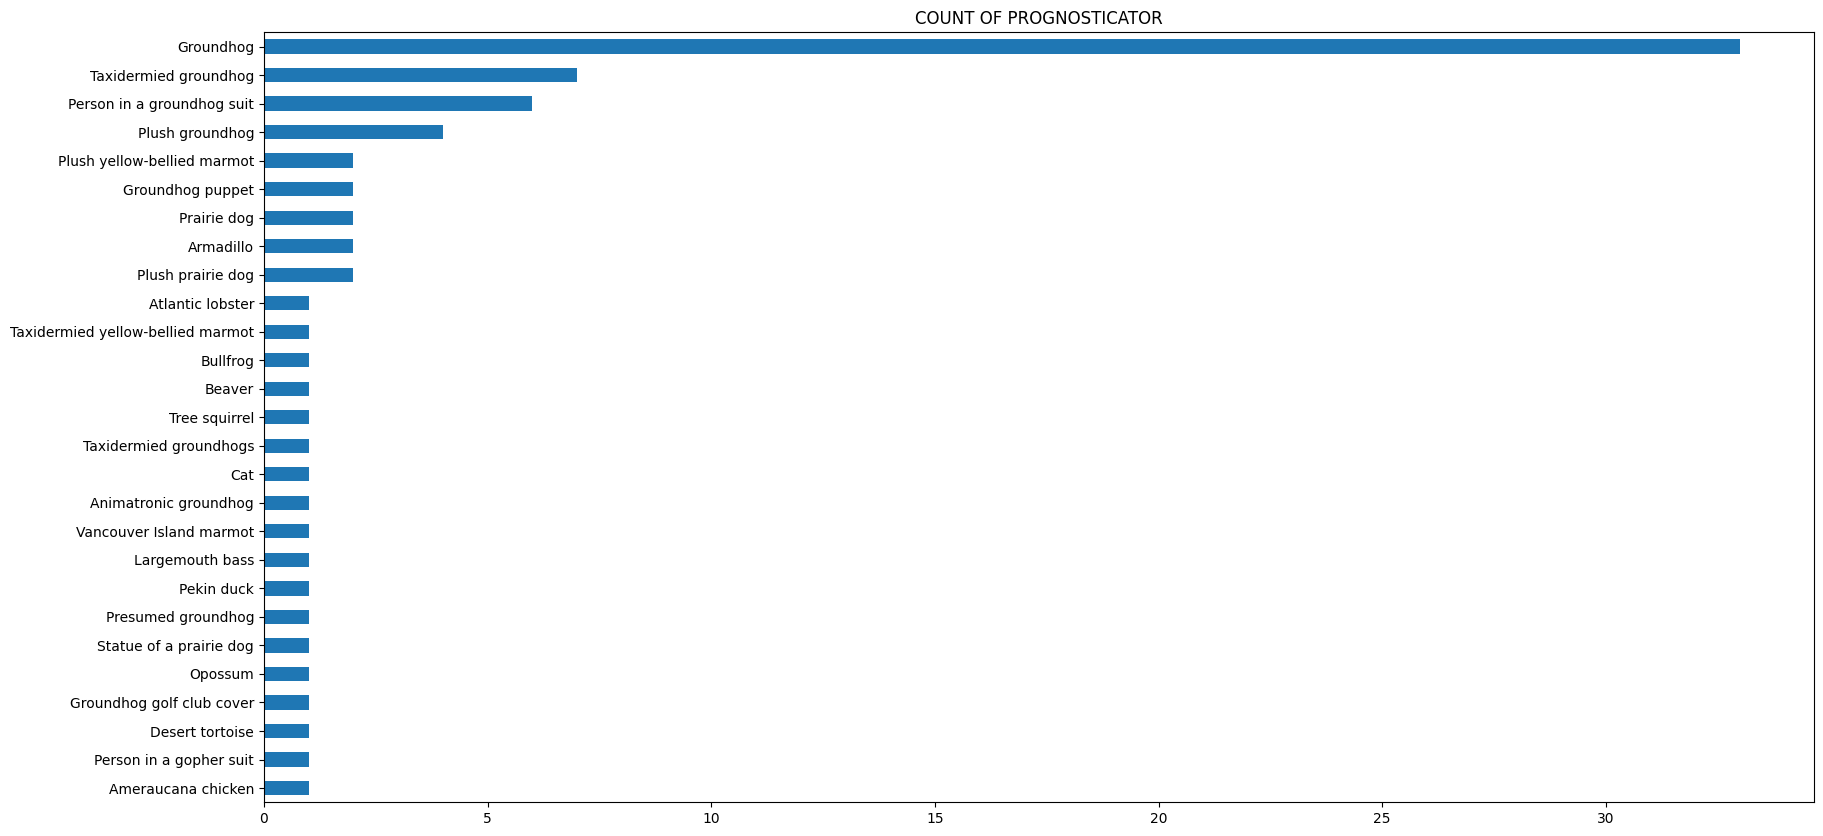

In [17]:
df_groundhog_dataset['type'].value_counts().sort_values(ascending = True).plot(kind = 'barh' , figsize= (20,10) , title = 'COUNT OF PROGNOSTICATOR')
plt.show()

In [18]:

progs = pd.DataFrame(resp.json()['groundhogs'])
for _, groundhogs in progs.iterrows():
  break
  groundhogs

In [19]:
prognosticator_df=pd.DataFrame(groundhogs['predictions'])
prognosticator_df

,year,shadow,details
0,1886,NaN,Groundhog Day first recognized in Punxsutawney...
1,1887,1.0,First Official trek to Gobbler’s Knob. Saw Sha...
2,1888,1.0,Saw Shadow.
3,1889,NaN,No Record.
4,1890,0.0,No Shadow.
...,...,...,...
134,2020,0.0,NO Shadow at 7:26 AM; 30º with light snow fall...
135,2021,1.0,Shadow at 7:25 AM; 19º with light snow. Corona...
136,2022,1.0,Shadow at 7:27 AM; 27º with clear skies. A loy...
137,2023,1.0,Shadow at 7:24 AM; 13º with clear skies. PA Go...


In [20]:
prognosticator_df.to_csv('prognosticator.csv' , index = False)

In [21]:
prognosticator_df['id']='id'
prognosticator_df.assign(id=1)

,year,shadow,details,id
0,1886,NaN,Groundhog Day first recognized in Punxsutawney...,1
1,1887,1.0,First Official trek to Gobbler’s Knob. Saw Sha...,1
2,1888,1.0,Saw Shadow.,1
3,1889,NaN,No Record.,1
4,1890,0.0,No Shadow.,1
...,...,...,...,...
134,2020,0.0,NO Shadow at 7:26 AM; 30º with light snow fall...,1
135,2021,1.0,Shadow at 7:25 AM; 19º with light snow. Corona...,1
136,2022,1.0,Shadow at 7:27 AM; 27º with clear skies. A loy...,1
137,2023,1.0,Shadow at 7:24 AM; 13º with clear skies. PA Go...,1


In [22]:
prognosticator_df.assign(**groundhogs[['id','slug']].to_dict())[['id','slug','shadow','details']].to_csv('slug.csv' , index=False)


In [23]:
!ls

groundhod_df.csv  prognosticator.csv  sample_data  slug.csv
